## Importation des librairies pandas et json

On import tout d'abord les librairies pandas pour la manipulation de données, json pour importer les fichiers JSON 
et matplotlib pour visualiser les données

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json

## Question 1: 

*Extraire les données des fichiers et les placer dans un tableau restituant pour chaque rameur 
sa performance, à savoir son temps sur 2000m, la cadence moyenne sur 2000m, le nombre de coups de rames sur 2000m,  
le temps sur chaque portion de 500m, la cadence moyenne sur chaque portion de 500m, le nombre de coups de rame sur chaque portion de 500m.  
le tableau aura une ligne par rameur.*


### **Analyse des données du participant : Maxime**  

#### **Données générales**
- **Distance totale parcourue :** 2000 mètres
- **Temps total (Time) :** `6:33.4`  
    _(Temps pour compléter la course de 2000 mètres, soit **6 minutes et 33,4 secondes**)_
- **Cadence moyenne (SPM) :** `28 coups/min`  
    _(Cadence moyenne sur l'ensemble de la course, exprimée en coups de rame par minute)_


#### **Analyse segmentée par 500 mètres :**

| **Segment** | **Split Time (s)** | **Nombre de coups (Split Stroke Count)** | **Cadence (SPM)** |
|:-----------:|:------------------:|:---------------------------------------:|:-----------------:|
| **0-500m**  | `1:41.6`             | `44 coups`                              | `26 coups/min`     |
| **500-1000m**| `1:42.0`             | `43 coups`                              | `25 coups/min`     |
| **1000-1500m**| `1:37.6`            | `47 coups`                              | `29 coups/min`     |
| **1500-2000m**| `1:32.1`            | `52 coups`                              | `34 coups/min`     |


##### **Résumé de la performance :**

- Le **temps par segment** varie légèrement, allant de `1:32` à `1:42` sur 500 mètres.
- Le nombre de **coups de rame par segment** (Split Stroke Count) se situe entre `44` et `52 coups`.
- La **cadence** (Split Stroke Rate) augmente progressivement, passant de `26 coups/min` dans les premiers 500 mètres à `34 coups/min` dans les derniers 500 mètres.

##### **Observations clés :**
- Maxime maintient une **cadence stable** au cours des trois premiers segments, mais augmente de manière significative lors des 500 derniers mètres.


Notre première étape serait d'utiliser une fonction pour convertir le format en dixième de secondes en format 'mm:ss' pour avoir le temps en dixièmes de seconde

Cette fonction va permettre de mieux déterminer la cadence moyenne sur 2000m et le temps de chaque portion de 500m sous format 'mm:ss' pour chaque participant

In [2]:
def convert_tenths_to_time_format(time_in_tenths):
    """Convertit un temps en dixièmes de secondes en format 'mm:ss'."""
    total_seconds = time_in_tenths / 10
    minutes = int(total_seconds // 60)
    seconds = total_seconds % 60
    return f"{minutes}:{seconds:04.1f}"

La deuxième fonction serait de récupérer tout les fichiers JSON qui se trouve dans un dossier défini en récupérant une liste de tout les chemins vers le fichier JSON 

In [3]:
def build_path_json(dossier):
    list_all_path = []
    # Lister les fichiers du dossier
    for fichier in os.listdir(dossier):
        # Vérifier si le fichier se termine par .json
        if fichier.endswith('.json'):
            # Construire le chemin complet vers le fichier
            chemin_complet = os.path.join(dossier, fichier)
            list_all_path.append(chemin_complet)
    
    return list_all_path


**La troisième fonction est l'étape du processus de données pour permettre d'appliquer l'extraction des données en lisant tout les chemins des fichiers JSON**

Pour chaque fichier JSON, on va récupérer les résultats du participant et de convertir le score en secondes,
ensuite on va créer un dictionnaire pour définir à un temps sur 2000m avec 4 variables:
On va attribuer dans ces variables qui se trouve sur le fichier JSON

- **Le nom du participant**
- **Le temps total sur 2000m** 
- **La cadence moyenne sur 2000m**
- **Le total de coups de rame sur 2000m** 


Pour déterminer un temps 500m pour chaque portion on va extraire les données 
- **Le temps total sur 500m** 
- **La cadence moyenne sur 500m** 
- **Le total de coups de rame sur 500m** 

In [4]:
def data_preprocess_json_to_list(dossier):
    data = [] 
    all_path = build_path_json(dossier)
    for path in all_path:
        # Ouvrir et lire le fichier JSON
        with open(path, 'r', encoding='utf-8') as f:
            race_data = json.load(f)['results']['participants']
            for participant in race_data:                
                # Créer un dictionnaire pour chaque participant
                row = {
                    'Participant': participant['participant'],
                    'TotalTime2000m': participant["score"],  # Temps total sec:min
                    'AvgCadenceMin2000m': participant['spm'],  # Cadence moyenne (coups/minute sur 2000m)
                    'TotalStrokes2000m': sum([split['split_stroke_count'] for split in participant['splits']])  # Total des coups de rame
                }
                
                # Extraire les données pour chaque portion de 500m
                for i, split in enumerate(participant['splits']):
                    # Convertir les temps en dixièmes de seconde pour chaque portion
                    row[f'Time500mP{i+1}'] = convert_tenths_to_time_format(split['split_time'])  # Temps pour chaque portion
                    row[f'AvgCadenceMin500mP{i+1}'] = split['split_stroke_rate']  # Cadence moyenne (coups/min) pour chaque portion
                    row[f'Strokes500mP{i+1}'] = split['split_stroke_count']  # Coups de rame pour chaque portion
                
                # Ajouter les données au tableau final
                data.append(row)
    return data 

In [5]:
#On doit définir le chemin du répertoire appelé files_json et on doit rechercher si le dossier possède t-il tout les fichiers JSON 
directory_path = 'files_json'
list_data = data_preprocess_json_to_list(directory_path)

On retourne un dataframe qui affichera chaque participant par ligne en fonction les résultats obtenus. 

In [6]:
# Passer sous format Pandas
df = pd.DataFrame(list_data)

df.head()

,Participant,TotalTime2000m,AvgCadenceMin2000m,TotalStrokes2000m,Time500mP1,AvgCadenceMin500mP1,Strokes500mP1,Time500mP2,AvgCadenceMin500mP2,Strokes500mP2,Time500mP3,AvgCadenceMin500mP3,Strokes500mP3,Time500mP4,AvgCadenceMin500mP4,Strokes500mP4
0,Maxime,6:33.4,28,186,1:41.6,26,44,1:42.0,25,43,1:37.6,29,47,1:32.1,34,52
1,Célestin,7:01.8,28,199,1:43.1,27,46,1:46.9,25,44,1:47.3,28,50,1:44.4,34,59
2,Julien,7:47.0,26,210,1:56.4,25,48,2:00.5,24,49,1:55.2,28,54,1:54.8,31,59
3,Neve,8:12.4,27,229,2:03.5,26,54,2:07.2,25,52,2:02.8,28,58,1:58.8,33,65
4,Eric,7:57.3,27,219,1:59.4,28,56,2:01.2,26,53,2:01.2,27,54,1:55.5,29,56


Informations des données sur le dataframe

Nous avons au total 32 lignes de participants

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Participant          32 non-null     object
 1   TotalTime2000m       32 non-null     object
 2   AvgCadenceMin2000m   32 non-null     int64 
 3   TotalStrokes2000m    32 non-null     int64 
 4   Time500mP1           32 non-null     object
 5   AvgCadenceMin500mP1  32 non-null     int64 
 6   Strokes500mP1        32 non-null     int64 
 7   Time500mP2           32 non-null     object
 8   AvgCadenceMin500mP2  32 non-null     int64 
 9   Strokes500mP2        32 non-null     int64 
 10  Time500mP3           32 non-null     object
 11  AvgCadenceMin500mP3  32 non-null     int64 
 12  Strokes500mP3        32 non-null     int64 
 13  Time500mP4           32 non-null     object
 14  AvgCadenceMin500mP4  32 non-null     int64 
 15  Strokes500mP4        32 non-null     int64 
dtypes: int64(1

In [8]:
print(f"La taille des données est {len(df)}")

La taille des données est 32


In [9]:
print(f"Le nombre de participants uniques est",len(df["Participant"].unique()))

Le nombre de participants uniques est 32


In [10]:
df.to_csv('data/rowers.csv')

## Question 2:

*En déduire pour chaque participant la vitesse moyenne en km/h sur 2000m, la vitesse moyenne en km/h sur chaque portion de 500m, 
la longueur moyenne parcourue par coup de rame sur 2000m, la longueur moyenne parcourue par coup de rame sur chaque portion de 500m.*

Nous allons définir une fonction pour convertir le temps au format "minutes:secondes" en heures pour le temps total vu qui est défini en secondes 

`Temps total (en heures)= (minutes + secondes/60)/60`

In [11]:
# Fonction pour convertir le temps au format "minutes:secondes" en heures
def time_to_hours(time_str):
    minutes, seconds = map(float, time_str.split(':'))
    return (minutes + seconds / 60) / 60

La formule de base est `vitesse = distance/temps` <br>

On calcule ensuite la vitesse moyenne (km/h) pour 2000m et pour chaque portion de 500m <br>
Lorsque on divise la distance en mètres par 1000, on obtient la distance en kilomètres, ce qui permet de calculer la vitesse en kilomètres par heure (km/h) lorsqu'on divise par le temps en heure. <br>

On a: `Vitesse moyenne pour 2000 m (km/h)= (2000m / 1000) /  Temps total (en heures)` <br>

Si on a pour chaque portion on applique la même méthode mais pour 500 m on a: <br>
`Vitesse moyenne pour 500 m (km/h)= (500m / 1000) /  Temps total (en heures)`  <br>

In [12]:
distances = {'2000m': 2000, '500m': 500}

#On vérifie si la distance vaut 2000m et 500m 
for distance, value in distances.items():
    if distance == '2000m': 
        df[f'AvgSpeedKmh{distance}'] = ((value / 1000) / df[f'TotalTime{distance}'].apply(time_to_hours)).round(2)
    elif distance == '500m': 
        for i in range(1, 5):
            df[f'AvgSpeedKmh{distance}P{i}'] = ((value / 1000) / df[f'Time{distance}P{i}'].apply(time_to_hours)).round(2)

​La longueur moyenne par coup de rame sur la totalité des 2000m et 500m est calculée par : <br>
`Longueur par coup de rame sur 2000m = 2000m / Nombre total de coups de rame` <br>
`Longueur par coup de rame sur 500m = 500m / Nombre total de coups de rame` <br>

In [13]:
# Calcul de la longueur moyenne par coup de rame pour 2000m et pour chaque portion de 500m
df['StrokeLength2000m'] = (2000 / df['TotalStrokes2000m']).round(2)

#Calcul de la longueur par coup de rame de 500m sur 4 portions différents:
for i in range(1, 5):
    df[f'StrokeLengh500mP{i}'] = (500 / df[f'Strokes500mP{i}']).round(2)

Résultat final pour la question 2

In [14]:
df_results = df[[ 
    'Participant', 'AvgSpeedKmh2000m', 'StrokeLength2000m',
    'AvgSpeedKmh500mP1', 'StrokeLengh500mP1',
    'AvgSpeedKmh500mP2', 'StrokeLengh500mP2',
    'AvgSpeedKmh500mP3', 'StrokeLengh500mP3',
    'AvgSpeedKmh500mP4', 'StrokeLengh500mP4'
]]

df_results.head()

,Participant,AvgSpeedKmh2000m,StrokeLength2000m,AvgSpeedKmh500mP1,StrokeLengh500mP1,AvgSpeedKmh500mP2,StrokeLengh500mP2,AvgSpeedKmh500mP3,StrokeLengh500mP3,AvgSpeedKmh500mP4,StrokeLengh500mP4
0,Maxime,18.30,10.75,17.72,11.36,17.65,11.63,18.44,10.64,19.54,9.62
1,Célestin,17.07,10.05,17.46,10.87,16.84,11.36,16.78,10.00,17.24,8.47
2,Julien,15.42,9.52,15.46,10.42,14.94,10.20,15.62,9.26,15.68,8.47
3,Neve,14.62,8.73,14.57,9.26,14.15,9.62,14.66,8.62,15.15,7.69
4,Eric,15.08,9.13,15.08,8.93,14.85,9.43,14.85,9.26,15.58,8.93


## Question 3

*Placer sur un graphique admettant en abscisse la cadence moyenne sur 500 et en ordonnée la longueur moyenne du coup sur 500 tous les points correspondant aux enregistrements sur 500m. <br> 
A quelle cadence la vitesse maximale est-elle atteinte ? A quel point cela correspond-il sur le graphique ?* <br> 

In [15]:
# Stockage une liste de cadence moyenne, longueur moyenne, et participants pour chaque portion
cadence_moyenne = []
longueur_moyenne = []
participants = []

for i in range(1, 5):
    cadence_moyenne.extend(df[f'AvgCadenceMin500mP{i}'])
    longueur_moyenne.extend(df[f'StrokeLengh500mP{i}'])
    participants.extend(df[f'Participant'])
       

# Extraction des vitesses moyennes pour chaque portion
vitesses = []
for i in range(1, 5):
    vitesses += df[f'AvgSpeedKmh500mP{i}'].tolist()

# Déterminer l'indice et la valeur de la vitesse maximale
indice_vitesse_max = vitesses.index(max(vitesses))
vitesse_max_participant = vitesses[indice_vitesse_max]

# Obtenir le participant correspondant à la vitesse maximale
participant_max_speed = participants[indice_vitesse_max]

# Obtenir la cadence et la longueur correspondant à la vitesse maximale
max_cadence = cadence_moyenne[indice_vitesse_max]
longueur_max_vitesse = longueur_moyenne[indice_vitesse_max]

# Afficher le récapitulatif
print(f"Le participant ayant la vitesse maximale est {participant_max_speed}")
print(f"Vitesse maximale : {vitesse_max_participant:.2f} km/h")
print(f"Cadence à la vitesse maximale : {max_cadence:.2f} rame/min")
print(f"Longueur de coup de rame correspondante : {longueur_max_vitesse:.2f} m")

Le participant ayant la vitesse maximale est Maxime
Vitesse maximale : 19.54 km/h
Cadence à la vitesse maximale : 34.00 rame/min
Longueur de coup de rame correspondante : 9.62 m


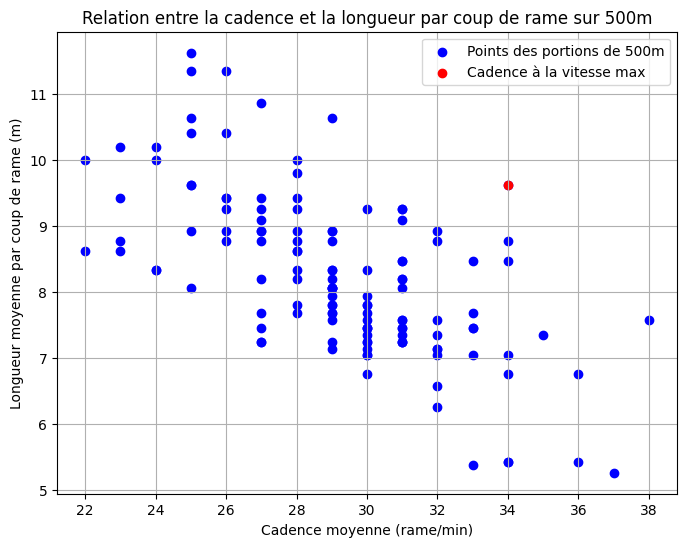

In [16]:
# Tracé du graphique
plt.figure(figsize=(8, 6))
plt.scatter(cadence_moyenne, longueur_moyenne, color='blue', label='Points des portions de 500m')
plt.scatter(x=max_cadence, y=longueur_max_vitesse , color='red', label='Cadence à la vitesse max')

# Ajout des labels
plt.title('Relation entre la cadence et la longueur par coup de rame sur 500m')
plt.xlabel('Cadence moyenne (rame/min)')
plt.ylabel('Longueur moyenne par coup de rame (m)')
plt.grid()
plt.legend()
plt.show()

In [17]:
df_results.to_csv('data/speed_length.csv')

### Aller plus loin 

Données statistiques 

In [18]:
df_results.describe()

,AvgSpeedKmh2000m,StrokeLength2000m,AvgSpeedKmh500mP1,StrokeLengh500mP1,AvgSpeedKmh500mP2,StrokeLengh500mP2,AvgSpeedKmh500mP3,StrokeLengh500mP3,AvgSpeedKmh500mP4,StrokeLengh500mP4
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,14.279063,8.218438,14.736250,8.330000,14.080000,8.593438,13.979688,8.278125,14.367500,7.775000
std,1.649978,1.139782,1.549799,1.248038,1.612802,1.349537,1.716798,1.208130,1.816544,1.014091
min,11.130000,5.380000,11.130000,5.430000,10.790000,5.380000,11.050000,5.430000,11.560000,5.260000
25%,13.400000,7.337500,13.790000,7.432500,13.297500,7.550000,12.962500,7.460000,13.507500,7.115000
50%,14.110000,8.260000,14.560000,8.200000,14.040000,8.550000,13.785000,8.200000,13.920000,7.635000
75%,15.065000,8.940000,15.485000,9.012500,14.752500,9.430000,14.707500,9.132500,15.315000,8.507500
max,18.300000,10.750000,17.820000,11.360000,17.650000,11.630000,18.440000,10.640000,19.540000,9.620000


In [19]:
df.describe()

,AvgCadenceMin2000m,TotalStrokes2000m,AvgCadenceMin500mP1,Strokes500mP1,AvgCadenceMin500mP2,Strokes500mP2,AvgCadenceMin500mP3,Strokes500mP3,AvgCadenceMin500mP4,Strokes500mP4,AvgSpeedKmh2000m,AvgSpeedKmh500mP1,AvgSpeedKmh500mP2,AvgSpeedKmh500mP3,AvgSpeedKmh500mP4,StrokeLength2000m,StrokeLengh500mP1,StrokeLengh500mP2,StrokeLengh500mP3,StrokeLengh500mP4
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,28.656250,248.187500,29.750000,61.343750,27.625000,59.625000,28.343750,61.718750,31.062500,65.500000,14.279063,14.736250,14.080000,13.979688,14.367500,8.218438,8.330000,8.593438,8.278125,7.775000
std,2.535037,37.034803,2.527271,9.420668,2.882092,9.800428,2.946943,9.568882,3.369096,9.658692,1.649978,1.549799,1.612802,1.716798,1.816544,1.139782,1.248038,1.349537,1.208130,1.014091
min,24.000000,186.000000,25.000000,44.000000,22.000000,43.000000,22.000000,47.000000,23.000000,52.000000,11.130000,11.130000,10.790000,11.050000,11.560000,5.380000,5.430000,5.380000,5.430000,5.260000
25%,27.000000,223.750000,28.000000,55.500000,25.000000,53.000000,27.000000,54.750000,29.750000,58.750000,13.400000,13.790000,13.297500,12.962500,13.507500,7.337500,7.432500,7.550000,7.460000,7.115000
50%,28.000000,242.000000,29.500000,61.000000,27.500000,58.500000,28.000000,61.000000,31.000000,65.500000,14.110000,14.560000,14.040000,13.785000,13.920000,8.260000,8.200000,8.550000,8.200000,7.635000
75%,30.000000,272.500000,31.250000,67.250000,30.000000,66.250000,30.000000,67.000000,33.000000,70.250000,15.065000,15.485000,14.752500,14.707500,15.315000,8.940000,9.012500,9.430000,9.132500,8.507500
max,34.000000,372.000000,35.000000,92.000000,33.000000,93.000000,34.000000,92.000000,38.000000,95.000000,18.300000,17.820000,17.650000,18.440000,19.540000,10.750000,11.360000,11.630000,10.640000,9.620000
